In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import os
import cv2
from sklearn.model_selection import train_test_split

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score,classification_report

In [3]:
# Define the path to the dataset and categories
path = r"C:\Users\admin\OneDrive\Desktop\fracture data set\FracAtlas/images"
cate = ['Fractured', 'Non_fractured']
image_size = 200

In [4]:
# Load and preprocess the dataset
input_image = []
for i in cate:
    folders = os.path.join(path, i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        if image_array is not None: 
            image_array = cv2.resize(image_array, (image_size, image_size))
            input_image.append([image_array, label])

In [5]:
# Separate features and labels
X = []
Y = []

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
# Convert the images to float32 and normalize
X = X.astype('float32') / 255.0

In [8]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [26]:
# # Define the model
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(2, activation='softmax')
# ])


In [34]:
n_classes=2

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(image_size, image_size, 3)), #32 neurons ,(3,3 actual filter size)
    MaxPooling2D((2, 2)),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),                   
    Dense(64, activation='relu'), 
    Dense(n_classes,activation='softmax'), # softmax it will normalize the probalty of classes
    
])
model.build(input_shape=(image_size, image_size, 3))

In [35]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train the model
model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
41/41 [==============================] - 171s 4s/step - loss: 0.4390 - accuracy: 0.8243 - val_loss: 0.4219 - val_accuracy: 0.8410
Epoch 2/5
41/41 [==============================] - 160s 4s/step - loss: 0.4367 - accuracy: 0.8300 - val_loss: 0.4280 - val_accuracy: 0.8379
Epoch 3/5
41/41 [==============================] - 159s 4s/step - loss: 0.4099 - accuracy: 0.8365 - val_loss: 0.3965 - val_accuracy: 0.8502
Epoch 4/5
41/41 [==============================] - 158s 4s/step - loss: 0.3999 - accuracy: 0.8434 - val_loss: 0.3835 - val_accuracy: 0.8609
Epoch 5/5
41/41 [==============================] - 159s 4s/step - loss: 0.3839 - accuracy: 0.8553 - val_loss: 0.3743 - val_accuracy: 0.8578


In [39]:
# Predictions
pred = model.predict(x_test)
pred_classes = pred.argmax(axis=1)

26/26 [==============================] - 14s 460ms/step


In [40]:
accuracy_score(y_test, pred_classes)

0.8323133414932681

In [41]:
confusion_matrix(y_test, pred_classes)

array([[ 30, 124],
       [ 13, 650]], dtype=int64)

In [42]:
print("Classification Report:\n", classification_report(y_test, pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.19      0.30       154
           1       0.84      0.98      0.90       663

    accuracy                           0.83       817
   macro avg       0.77      0.59      0.60       817
weighted avg       0.81      0.83      0.79       817



In [43]:
# Define the predict function
class_names = ['Fractured', 'Non_fractured']

In [44]:
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match the model input shape
    predictions = model.predict(image)
    confidence = np.max(predictions) * 100  # Get the confidence in percentage
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, confidence

In [45]:
# Create a TensorFlow dataset for the test set
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(buffer_size=len(x_test)).batch(32)

1/1 [==============================] - 0s 83ms/step


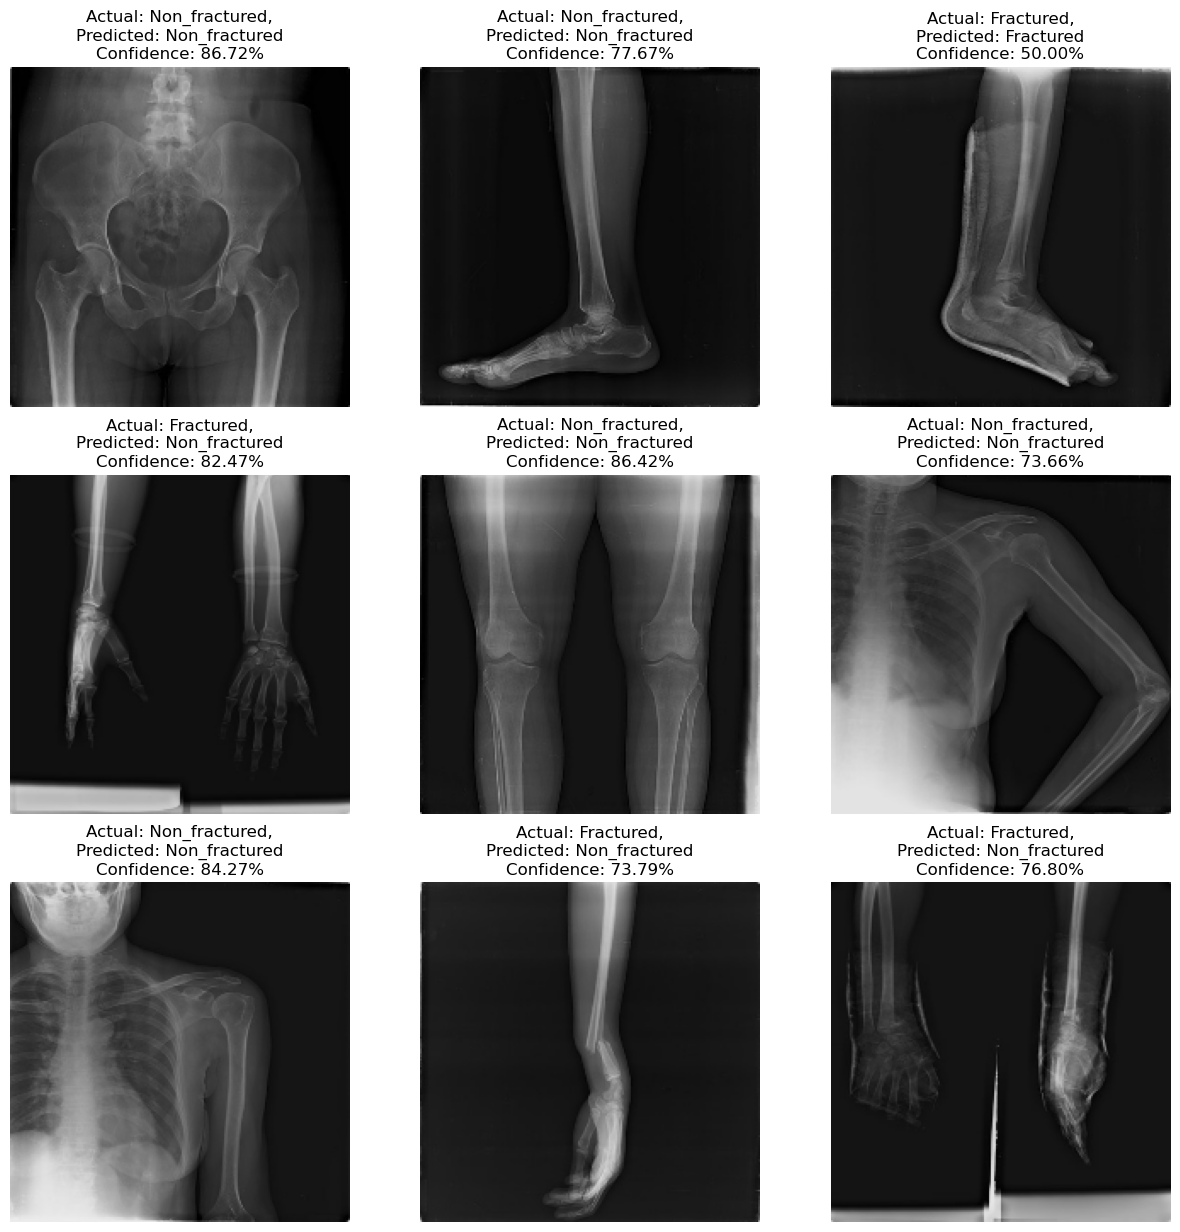

In [46]:
# Visualize the predictions
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):  # Take a single batch from the test dataset
    for i in range(9):  # Display the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)
        image_display = (images[i].numpy() * 255).astype("uint8")  # Scale back to [0, 255] for display
        plt.imshow(image_display)  # Display the image

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 

        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off") 

plt.show()